## Псевдослучайные числа

In [69]:
import random
import matplotlib.pyplot as plt

(array([ 2.,  2.,  6., 16., 23., 20., 10., 14.,  5.,  2.]),
 array([417., 433., 449., 465., 481., 497., 513., 529., 545., 561., 577.]),
 <a list of 10 Patch objects>)

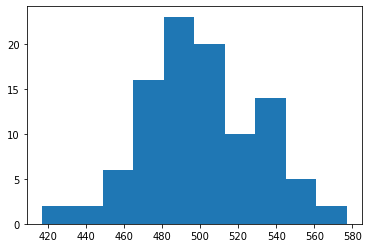

In [62]:
plt.hist([ sum([ random.randint(0,10) for _ in range(100) ]) for _ in range(100)])

## Треугольник Серпинского


In [83]:
vert = [(0,0),(1000,0),(500,1000)]
x,y = 500,500
X = []
Y = []
for _ in range(20000):
  vx,vy = random.choice(vert)
  x,y = (x+vx)/2, (y+vy)/2
  X.append(x)
  Y.append(y)


In [84]:
list(zip(X[:10], Y[:10]))

[(500.0, 750.0),
 (500.0, 875.0),
 (750.0, 437.5),
 (375.0, 218.75),
 (437.5, 609.375),
 (468.75, 804.6875),
 (734.375, 402.34375),
 (367.1875, 201.171875),
 (433.59375, 600.5859375),
 (466.796875, 800.29296875)]

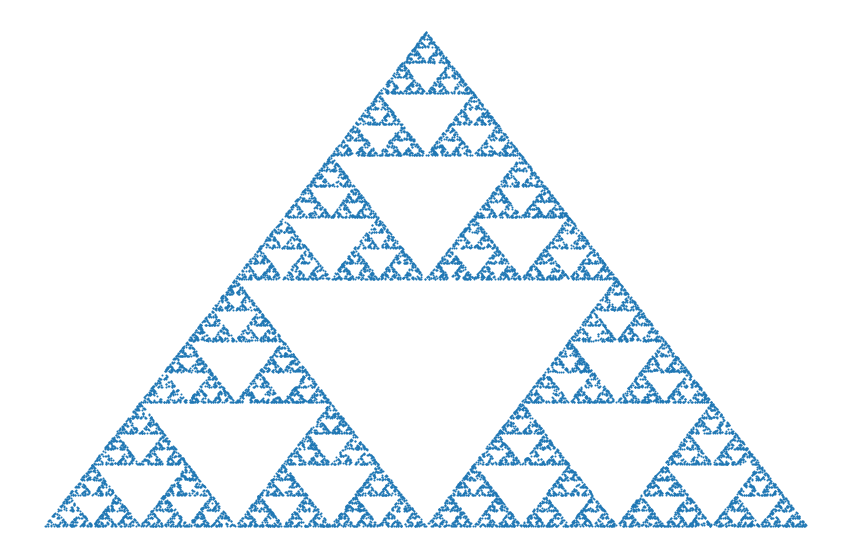

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(X,Y,s=1)
plt.axis('off')
plt.show()

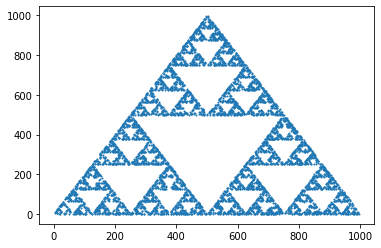

In [87]:
import itertools

def sierp(vert = [(0,0),(1000,0),(500,1000)]):
  x,y = 500,500
  while True:
    vx,vy = random.choice(vert)
    x,y = (x+vx)/2, (y+vy)/2
    yield (x,y)

v = list(itertools.islice(sierp(),7000))
x,y = zip(*v)
plt.scatter(x,y,s=1)


## Рекурсия


In [88]:
def fact(n):
  if n==1:
    return 1
  else:
    return n*fact(n-1)

fact(5)

120

In [112]:
def fib(n):
  print(f"Начинаем вычислять fib({n})")
  if n<3:
    print(f"Заканчиваем вычислять fib({n})")
    return n
  else:
    f1,f2 = fib(n-1),fib(n-2)
    print(f"Заканчиваем вычислять fib({n})")
    return f1+f2

fib(5) 

Начинаем вычислять fib(5)
Начинаем вычислять fib(4)
Начинаем вычислять fib(3)
Начинаем вычислять fib(2)
Заканчиваем вычислять fib(2)
Начинаем вычислять fib(1)
Заканчиваем вычислять fib(1)
Заканчиваем вычислять fib(3)
Начинаем вычислять fib(2)
Заканчиваем вычислять fib(2)
Заканчиваем вычислять fib(4)
Начинаем вычислять fib(3)
Начинаем вычислять fib(2)
Заканчиваем вычислять fib(2)
Начинаем вычислять fib(1)
Заканчиваем вычислять fib(1)
Заканчиваем вычислять fib(3)
Заканчиваем вычислять fib(5)


8

In [116]:
def fib(n):
  u,v = 1,2
  for _ in range(n-1):
    u,v = v,v+u
  return u

fib(50) 

20365011074

## Сортировка

In [117]:
 def sel_sort(x):
   n = len(x)
   for i in range(n-1):
     k = i
     for j in range(i,n):
       if x[j]<x[k]:
         k=j
     x[i],x[k] = x[k],x[i]
   return x

sel_sort([6,3,7,9,0,4])

[0, 3, 4, 6, 7, 9]

In [127]:
z = sel_sort([ random.randint(0,1000) for _ in range(10000) ])

In [126]:
def qsort(x):
  if len(x)==0:
    return []
  t = x[0]
  l = [ z for z in x[1:] if z<=t ]
  r = [ z for z in x[1:] if z>t ]
  ls = qsort(l)
  rs = qsort(r)
  return ls + [t] + rs

qsort([6,3,2,8,9,4])

[2, 3, 4, 6, 8, 9]

In [129]:
z = qsort([ random.randint(0,1000) for _ in range(10000) ])

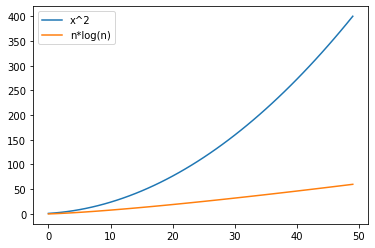

In [138]:
import numpy as np
x = np.linspace(1,20)
plt.plot(x**2,label="x^2")
plt.plot(x*np.log(x),label="n*log(n)")
plt.legend()

## Снежинка Коха

In [70]:
import jturtle as t

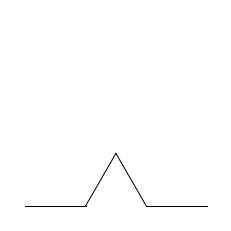

In [71]:
t.right(90)

t.forward(30)
t.left(60)
t.forward(30)
t.right(120)
t.forward(30)
t.left(60)
t.forward(30)
t.done()

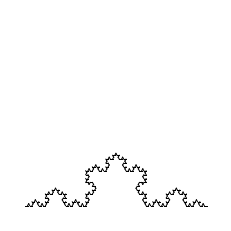

In [148]:
def koch(x,n):
  if n==0:
    t.forward(x)
  else:
    koch(x/3,n-1)
    t.left(60)
    koch(x/3,n-1)
    t.right(120)
    koch(x/3,n-1)
    t.left(60)
    koch(x/3,n-1)

t.right(90)
koch(100,4)
t.done()

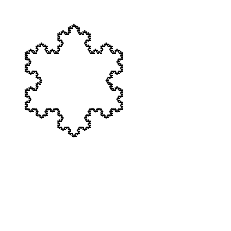

In [153]:
def snowflake(x,n):
  for _ in range(3):
    koch(x,n)
    t.right(120)

t.left(90)
snowflake(100,4)
t.done()

![](https://raw.githubusercontent.com/shwars/pycourse/master/images/Quadratic_Koch_curve_type2_iterations.png)

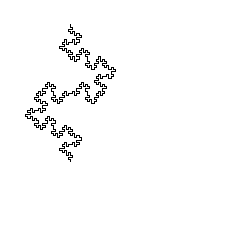

In [154]:
def minkowski(x,n):
  if n==0:
    t.forward(x)
  else:
    for u in [90,-90,-90,0,90,90,-90,0]:
      minkowski(x/4,n-1)
      t.left(u)

minkowski(100,3)
t.done()

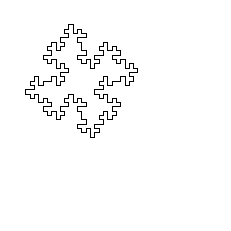

In [156]:
for _ in range(4):
  minkowski(100,2)
  t.left(90)
t.done()

## Деревья

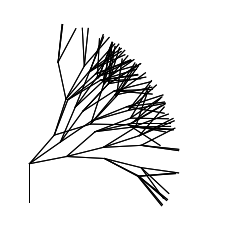

In [161]:
def tree(n,b,x,la=-40,ra=40):
  t.forward(x)
  if n>0:
    for _ in range(b):
      a = random.randint(la,ra)
      t.right(a)
      tree(n-1,b,x)
      t.left(a)
  t.forward(-x)

tree(4,3,100,0,90)
t.done()

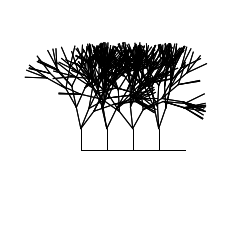

In [166]:
for _ in range(4):
  tree(4,3,100)
  t.right(90)
  t.forward(120)
  t.left(90)
t.done()

## L-системы

In [72]:
g = { 'F' : 'F+F-F-F+F' }

def apply(g,s):
  res = []
  for c in s:
    if c in g:
      res.append(g[c])
    else:
      res.append(c)
  return "".join(res)

def napply(g,n,s):
  for _ in range(n):
    s = apply(g,s)
  return s

napply(g,5,'F')

'F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F+F+F-F-F+F+F+F-F-F+F-F+F-F-F+F-F+F-F-F+F+F+F-F-F+F

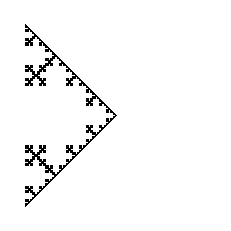

In [73]:
def draw(s,angle=90):
  for c in s:
    if c in ['F','G']:
      t.forward(100)
    elif c=='+':
      t.right(angle)
    elif c=='-':
      t.left(angle)
    else:
      pass

draw(napply(g,5,'F'))
t.done()

**Треугольник Серпинского**
- Начальный символ: F-G-G
- Правила грамматики:
  - F → F-G+F+G-F
  - G → GG
- Угол поворота: 120


In [74]:
gs = { 'F' : 'F-G+F+G-F', 'G' : 'GG' }
napply(gs,3,'F-G-G')

'F-G+F+G-F-GG+F-G+F+G-F+GG-F-G+F+G-F-GGGG+F-G+F+G-F-GG+F-G+F+G-F+GG-F-G+F+G-F+GGGG-F-G+F+G-F-GG+F-G+F+G-F+GG-F-G+F+G-F-GGGGGGGG-GGGGGGGG'

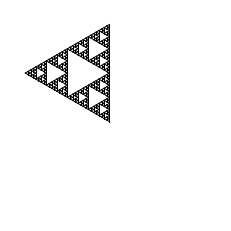

In [75]:
draw(napply(gs,5,'F-G-G'),120)
t.done()

Сглаженный треугольник Серпинского:
* Правила:
  * F → G-F-G
  * G → F+G+F
* Начальный символ: F
* Угол поворота: 60


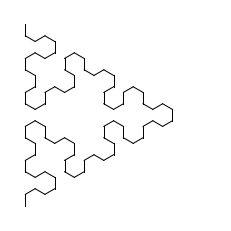

In [76]:
gs1 = { 'F' : 'G-F-G', 'G' : 'F+G+F' }
draw(napply(gs1,4,'F'),60)
t.done()

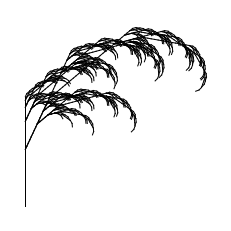

In [101]:
def getState(t):
  z = t.ensureTurtle()
  return (z.direction, z.x, z.y)

def setState(t,s):
  z = t.ensureTurtle()
  z.direction, z.x, z.y = s

def draw(s,angle=90):
  stk = []
  for c in s:
    if c in ['F','G']:
      t.forward(100)
    elif c=='+':
      t.right(angle)
    elif c=='-':
      t.left(angle)
    elif c=='[':
      stk.append(getState(t))
    elif c==']':
      setState(t,stk.pop())
    else:
      pass

g = { 'X' : 'F−[[X]+X]+F[+FX]−X)', 'F' : 'FF' }
draw(napply(g,5,'X'),25)
t.done()